<h1>Project: Credit Card Payments - Default<h1>

<h4>Source:</h4>

Name: I-Cheng Yeh
email addresses: (1) icyeh '@' chu.edu.tw (2) 140910 '@' mail.tku.edu.tw
institutions: (1) Department of Information Management, Chung Hua University, Taiwan. (2) Department of Civil Engineering, Tamkang University, Taiwan.

Data set found at:
https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients#

<h4>Data Set Information:</h4>

This research aimed at the case of customers default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. 

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.<br>
X2: Gender (1 = male; 2 = female).<br>
X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).<br>
X4: Marital status (1 = married; 2 = single; 3 = others).<br>
X5: Age (year).<br>
X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: <br>
X6 = the repayment status in September, 2005; <br>
X7 = the repayment status in August, 2005; . . .;<br>
X11 = the repayment status in April, 2005. <br>
<br>
The measurement scale for the repayment status is: <br>
-1 = pay duly; <br>
1 = payment delay for one month; <br>
2 = payment delay for two months; . . .; <br>
8 = payment delay for eight months; <br>
9 = payment delay for nine months and above.<br>
<br>
X12-X17: Amount of bill statement (NT dollar). <br>
X12 = amount of bill statement in September, 2005; 
X13 = amount of bill statement in August, 2005; . . .; <br>
X17 = amount of bill statement in April, 2005.<br>
X18-X23: Amount of previous payment (NT dollar). <br>
X18 = amount paid in September, 2005; <br>
X19 = amount paid in August, 2005; . . .;<br>
X23 = amount paid in April, 2005.



<b> Data Load </b>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cc_data = pd.read_excel("default of credit card clients.xls")

<h2> Data Exploration & Data Cleaning <h2>

In [3]:
cc_data.shape

(30001, 25)

In [4]:
cc_data.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


Observations:
1. The column names are X1, X2,X3 and so on. We need to rename them to make it sensible
2. The second row corresponds mre to the actual column names, so we can use that instead and rename accordingly
3. The column ID just corresponds to index and can be dropped

In [5]:
cc_data[0:1]

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month


In [6]:
cc_data.columns

Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [7]:
# Dropping the first column storing the index values
cc_data.drop("Unnamed: 0",axis=1,inplace=True)

In [8]:
#Renaming Columns
cc_data.rename(columns={"X1":"Limit_bal","X2":"Sex","X3":"Education","X4":"Marital_status",
                       "X5":"Age","X6":"Repay_Status_Sep05","X7":"Repay_Status_Aug05",
                       "X8":"Repay_Status_Jul05","X9":"Repay_Status_Jun05",
                       "X10":"Repay_Status_May05","X11":"Repay_Status_Apr05",
                       "X12":"Bill_Amt_Sep05","X13":"Bill_Amt_Aug05",
                       "X14":"Bill_Amt_Jul05","X15":"Bill_Amt_Jun05",
                       "X16":"Bill_Amt_May05","X17":"Bill_Amt_Apr05",
                       "X18":"Amt_Paid_Sep05","X19":"Amt_Paid_Aug05",
                       "X20":"Amt_Paid_Jul05","X21":"Amt_Paid_Jun05",
                       "X22":"Amt_Paid_May05","X23":"Amt_Paid_Apr05"},inplace=True)

In [9]:
#Dropping the first row which had the previous column names in Caps
cc_data.drop([0],inplace=True)

In [10]:
#Resetting the row index
cc_data.reset_index(drop=True)

,Limit_bal,Sex,Education,Marital_status,Age,Repay_Status_Sep05,Repay_Status_Aug05,Repay_Status_Jul05,Repay_Status_Jun05,Repay_Status_May05,...,Bill_Amt_Jun05,Bill_Amt_May05,Bill_Amt_Apr05,Amt_Paid_Sep05,Amt_Paid_Aug05,Amt_Paid_Jul05,Amt_Paid_Jun05,Amt_Paid_May05,Amt_Paid_Apr05,Y
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [11]:
cc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
Limit_bal             30000 non-null object
Sex                   30000 non-null object
Education             30000 non-null object
Marital_status        30000 non-null object
Age                   30000 non-null object
Repay_Status_Sep05    30000 non-null object
Repay_Status_Aug05    30000 non-null object
Repay_Status_Jul05    30000 non-null object
Repay_Status_Jun05    30000 non-null object
Repay_Status_May05    30000 non-null object
Repay_Status_Apr05    30000 non-null object
Bill_Amt_Sep05        30000 non-null object
Bill_Amt_Aug05        30000 non-null object
Bill_Amt_Jul05        30000 non-null object
Bill_Amt_Jun05        30000 non-null object
Bill_Amt_May05        30000 non-null object
Bill_Amt_Apr05        30000 non-null object
Amt_Paid_Sep05        30000 non-null object
Amt_Paid_Aug05        30000 non-null object
Amt_Paid_Jul05        30000 non-null object
Amt_Paid_Ju

The last Column 'Y' was the output variable, droppng that so that we can make a new data model

In [12]:
cc_data.drop("Y",axis=1,inplace=True)

In [13]:
cc_data = cc_data.astype("int")

In [14]:
cc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 23 columns):
Limit_bal             30000 non-null int32
Sex                   30000 non-null int32
Education             30000 non-null int32
Marital_status        30000 non-null int32
Age                   30000 non-null int32
Repay_Status_Sep05    30000 non-null int32
Repay_Status_Aug05    30000 non-null int32
Repay_Status_Jul05    30000 non-null int32
Repay_Status_Jun05    30000 non-null int32
Repay_Status_May05    30000 non-null int32
Repay_Status_Apr05    30000 non-null int32
Bill_Amt_Sep05        30000 non-null int32
Bill_Amt_Aug05        30000 non-null int32
Bill_Amt_Jul05        30000 non-null int32
Bill_Amt_Jun05        30000 non-null int32
Bill_Amt_May05        30000 non-null int32
Bill_Amt_Apr05        30000 non-null int32
Amt_Paid_Sep05        30000 non-null int32
Amt_Paid_Aug05        30000 non-null int32
Amt_Paid_Jul05        30000 non-null int32
Amt_Paid_Jun05        30000 non

Now we have no null values in our dataset, an all columns with the right data type 

<h2> Data Analysis </h2>

In [15]:
cc_data.describe()

,Limit_bal,Sex,Education,Marital_status,Age,Repay_Status_Sep05,Repay_Status_Aug05,Repay_Status_Jul05,Repay_Status_Jun05,Repay_Status_May05,...,Bill_Amt_Jul05,Bill_Amt_Jun05,Bill_Amt_May05,Bill_Amt_Apr05,Amt_Paid_Sep05,Amt_Paid_Aug05,Amt_Paid_Jul05,Amt_Paid_Jun05,Amt_Paid_May05,Amt_Paid_Apr05
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


Looks like everyone had a minimum limit balance (bank balance) of 10000 NT and a number of them still defaulted in their payments.


Since Sep'05 is the latest month in the dataset, finding out the number of people who were defaulting in the same period

In [16]:
#Finding the defaultee numbers for period: Sep-05
cc_data[cc_data["Repay_Status_Sep05"]>0].shape

(6818, 23)

6818 people had payment delays in Sep 2005 out of 30,000

In [17]:
repay_Sep = cc_data.groupby("Repay_Status_Sep05").size()

In [18]:
repay_Aug = cc_data.groupby("Repay_Status_Aug05").size()

In [19]:
repay_Jul = cc_data.groupby("Repay_Status_Jul05").size()

In [20]:
repay_Jun = cc_data.groupby("Repay_Status_Jun05").size()

In [21]:
repay_May = cc_data.groupby("Repay_Status_May05").size()

In [22]:
repay_Apr = cc_data.groupby("Repay_Status_Apr05").size()

<b>Observations:</b><br>
Out of 30,000 people in the data set a majority of them had either paid off their Credit Card bill (Status: 0 and -2),
5686 are yet to pay their recent bill within time (status: -1)
3688 defaulted 1 month's bill
2667 did not pay 2 months bill and the numbers drop off thereafter

Based on the above stats, there is room to understand the patterns between the defaultees (especially status :1 & 2) and features like - Sex, Education, Marital_Status, Age, History of past Payment

<h2> Data Visualization </h2>

Plotting the defaultee counts from April to September 2005

Text(0.5, 1.0, 'Count of People Defaulted across Months')

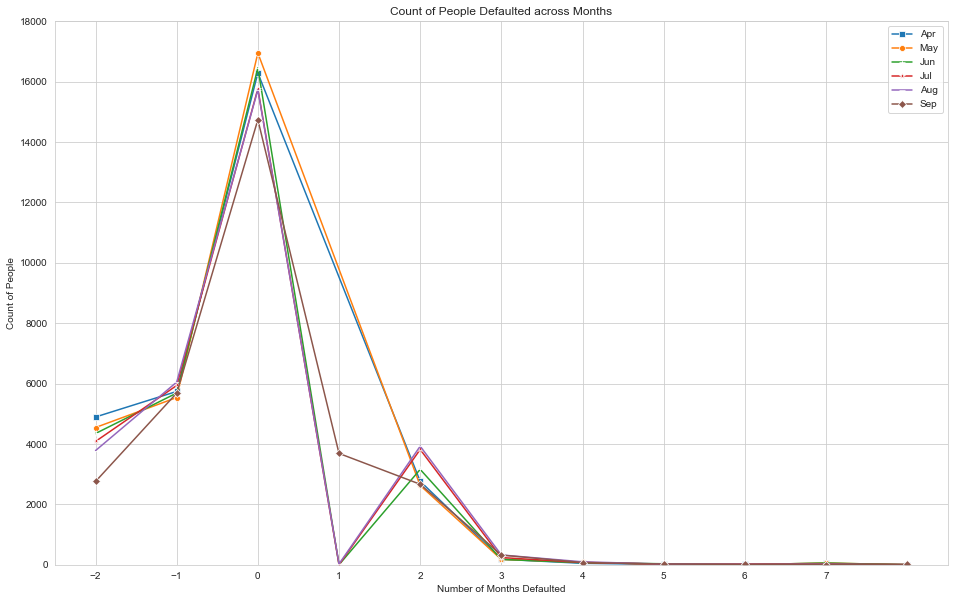

In [23]:
plt.figure(figsize=(16,10))
sns.set_style("whitegrid")
sns.lineplot(data=repay_Apr,marker='s')
sns.lineplot(data=repay_May,marker='o')
sns.lineplot(data=repay_Jun,marker='+')
sns.lineplot(data=repay_Jul,marker='*')
sns.lineplot(data=repay_Aug,marker='_')
sns.lineplot(data=repay_Sep,marker='D')

plt.legend(["Apr","May","Jun","Jul","Aug","Sep"])
plt.xticks(np.arange(-2,8,1))
plt.ylim(0,18000)
plt.xlabel("Number of Months Defaulted")
plt.ylabel("Count of People")
plt.title("Count of People Defaulted across Months")

<b>Observations</b><br>
<i>Payments - 1 Month Overdue</i><br>
September'05 was the only month which has 1 month defaultees (around 3700 mark). For other months the numbers are very small (less than 50)<br>
<i>Payments - 2 Months Overdue</i><br>
Interestingly, April, May and September converge to a number of 3000 people
Whereas in Jul and August the numbers were close to 4000<br>
<i>Payments - 3 Months+ Overdue</i><br>
The number of defaultees for 3 Months+ are very low, lesser than 500 mark for all months.
So, the existing bank balance comes into picture here where most of them do not want to default more than 2 months.




Text(0.5, 1.0, 'Age Distribution')

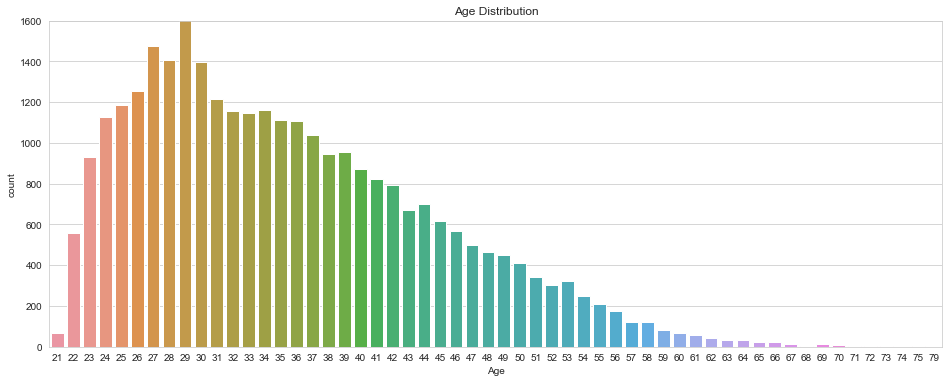

In [24]:
#Generating Age Distribution in the data population
plt.figure(figsize=(16,6))
sns.countplot(cc_data["Age"])
plt.ylim(0,1600)
plt.title("Age Distribution")

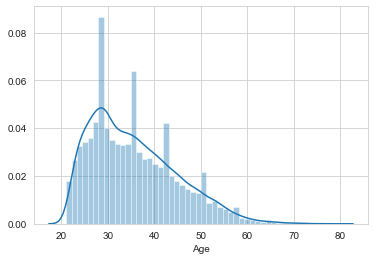

In [25]:
sns.distplot(cc_data["Age"])

Majority of population in the dataset are in the demographics of 23 to 40 (count of 800+ people i each of thhe discrete age groups in this category)

Age based Visualization for April, May and September Months - which had high number of defaultees for single month in general

In [26]:
cc_data[cc_data["Repay_Status_Sep05"]==1]

,Limit_bal,Sex,Education,Marital_status,Age,Repay_Status_Sep05,Repay_Status_Aug05,Repay_Status_Jul05,Repay_Status_Jun05,Repay_Status_May05,...,Bill_Amt_Jul05,Bill_Amt_Jun05,Bill_Amt_May05,Bill_Amt_Apr05,Amt_Paid_Sep05,Amt_Paid_Aug05,Amt_Paid_Jul05,Amt_Paid_Jun05,Amt_Paid_May05,Amt_Paid_Apr05
14,70000,1,2,2,30,1,2,2,0,0,...,65701,66782,36137,36894,3200,0,3000,3000,1500,0
16,50000,2,3,3,23,1,2,0,0,0,...,28116,28771,29531,30211,0,1500,1100,1200,1300,1100
19,360000,2,1,1,49,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
20,180000,2,1,2,29,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
27,60000,1,1,2,27,1,-2,-1,-1,-1,...,259,-57,127,-189,0,1000,0,500,0,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29963,50000,1,2,2,30,1,-1,2,-1,-1,...,264,7300,0,0,528,0,7300,0,0,0
29974,230000,1,2,1,35,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
29975,50000,1,2,1,37,1,2,2,2,0,...,4328,2846,1585,1324,0,3000,0,0,1000,1000
29982,50000,1,2,1,44,1,2,2,2,0,...,33101,28192,22676,14647,2300,1700,0,517,503,585


In [27]:
def get_age_dist_defaultee(mthdt="Sep05",num_months=3):
    '''
    Function to calculate the count of defaultees segregeated by age for 3 categories: defaulted for 1 ,2 and 3 months.
    The parameter mthdt takes in value of a Month short form and year e.g. Apr05
    '''
    age_defaultee = []
    col_name = "Repay_Status_"+mthdt
    for var in np.arange(1,num_months+1,1):
        month_wise_age = cc_data[cc_data[col_name]==var]
        age_defaultee.append(month_wise_age.groupby("Age")[col_name].agg("count"))
    return(age_defaultee)    

In [28]:
sep_age_defaultee = get_age_dist_defaultee("Sep05",3)

In [29]:
apr_age_defaultee = get_age_dist_defaultee("Apr05",3)

In [30]:
may_age_defaultee = get_age_dist_defaultee("May05",3)

Text(0.5, 1.0, '1 Month Defaultees distributed by Age')

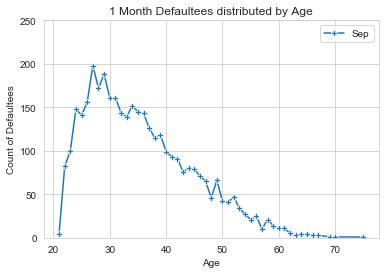

In [31]:
#Lineplot of Age wise distribution for 1 month defaultees in Apr, May and September
sns.lineplot(data=sep_age_defaultee[0],marker='P')
sns.lineplot(data=may_age_defaultee[0],marker='+')
sns.lineplot(data=apr_age_defaultee[0],marker='o')
plt.ylim(0,250)
plt.xlabel("Age")
plt.ylabel("Count of Defaultees")
plt.legend(["Sep","May","Apr"])
plt.title("1 Month Defaultees distributed by Age")

Text(0.5, 1.0, '2 Month Defaultees distributed by Age')

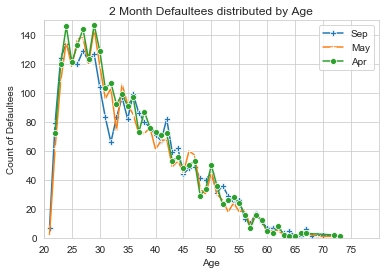

In [32]:
#Lineplot of Age wise distribution for 2 month defaultees in Apr, May and September
sns.lineplot(data=sep_age_defaultee[1],marker='P')
sns.lineplot(data=may_age_defaultee[1],marker='+')
sns.lineplot(data=apr_age_defaultee[1],marker='o')
plt.ylim(0,150)
plt.xlim(20,80)
plt.xticks(np.arange(20,80,5))
plt.xlabel("Age")
plt.ylabel("Count of Defaultees")
plt.legend(["Sep","May","Apr"])
plt.title("2 Month Defaultees distributed by Age")

Text(0.5, 1.0, '3 Month Defaultees distributed by Age')

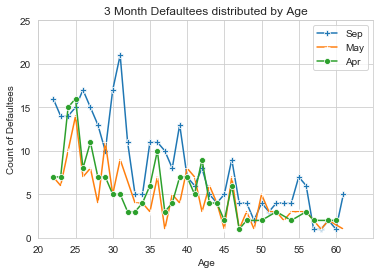

In [33]:
#Lineplot of Age wise distribution for 3 month defaultees in Apr, May and September
sns.lineplot(data=sep_age_defaultee[2],marker='P')
sns.lineplot(data=may_age_defaultee[2],marker='+')
sns.lineplot(data=apr_age_defaultee[2],marker='o')
plt.ylim(0,25)
plt.xlim(20,65)
plt.xticks(np.arange(20,65,5))
plt.xlabel("Age")
plt.ylabel("Count of Defaultees")
plt.legend(["Sep","May","Apr"])
plt.title("3 Month Defaultees distributed by Age")

Observation:
Majority age group of 1 & 2 Month defaultees is 23 - 28
Majority age group of 3 Month defaultees is 30 - 33

<h2>Data Modelling</h2>

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [35]:
cc_data.columns

Index(['Limit_bal', 'Sex', 'Education', 'Marital_status', 'Age',
       'Repay_Status_Sep05', 'Repay_Status_Aug05', 'Repay_Status_Jul05',
       'Repay_Status_Jun05', 'Repay_Status_May05', 'Repay_Status_Apr05',
       'Bill_Amt_Sep05', 'Bill_Amt_Aug05', 'Bill_Amt_Jul05', 'Bill_Amt_Jun05',
       'Bill_Amt_May05', 'Bill_Amt_Apr05', 'Amt_Paid_Sep05', 'Amt_Paid_Aug05',
       'Amt_Paid_Jul05', 'Amt_Paid_Jun05', 'Amt_Paid_May05', 'Amt_Paid_Apr05'],
      dtype='object')

In [36]:
#Splitting the independent and dependent features
X = cc_data.drop(columns="Repay_Status_Sep05")
y = cc_data["Repay_Status_Sep05"]

In [37]:
#Train Test Split data
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.4,random_state=42)

In [38]:
X_train.shape

(18000, 22)

<h3>Logistic Regression</h3>

In [89]:
lr = LogisticRegression(solver='lbfgs')

In [90]:
scaler = StandardScaler()
x_std = scaler.fit_transform(X_train)
model_lr = lr.fit(x_std,y_train)

C:\Users\Abc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [93]:
x_test_std = scaler.fit_transform(X_test)

In [94]:
y_pred_lr = model_lr.predict(x_test_std)

In [95]:
accuracy_score(y_test,y_pred_lr)

0.6699166666666667

Accuracy of 66.99% using Logistic Regression model

<h3>Multinomial Logistic Regression CV</h3>

In [70]:
#Using pipeline for scaling and applying multinomial logistic regression using solver: newtong-cg
input = [('scaler',StandardScaler()),('model',LogisticRegressionCV(random_state=0,cv=10,multi_class="multinomial",
                                                                   solver="newton-cg"))]

In [71]:
pipe = Pipeline(input)

In [72]:
pipe.fit(X_train,y_train)

C:\Users\Abc\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 6 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Abc\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\Abc\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\Abc\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\Abc\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 LogisticRegressionCV(Cs=10, class_weight=None, cv=10,
                                      dual=False, fit_intercept=True,
                                      intercept_scaling=1.0, l1_ratios=None,
                                      max_iter=100, multi_class='multinomial',
                                      n_jobs=None, penalty='l2', random_state=0,
                                      refit=True, scoring=None,
                                      solver='newton-cg', tol=0.0001,
                                      verbose=0))],
         verbose=False)

In [73]:
#Training set R2 score
pipe.score(X_train,y_train)

0.7414444444444445

In [75]:
y_predicted = pipe.predict(X_test)

In [79]:
#Test set - R2 score
pipe.score(X_test,y_test)

0.7349166666666667

In [81]:
#Test set - Accuracy score
accuracy_score(y_test,y_predicted)

0.7349166666666667

In [77]:
#Storing the actual (y_test) and predicted values(y_predicted) in a dataframe
act_pred_df = pd.DataFrame({"Actuals":y_test,"Predicted":y_predicted}) 

Text(0.5, 1.0, 'Actual vs Predicted - Month wise Defaultee')

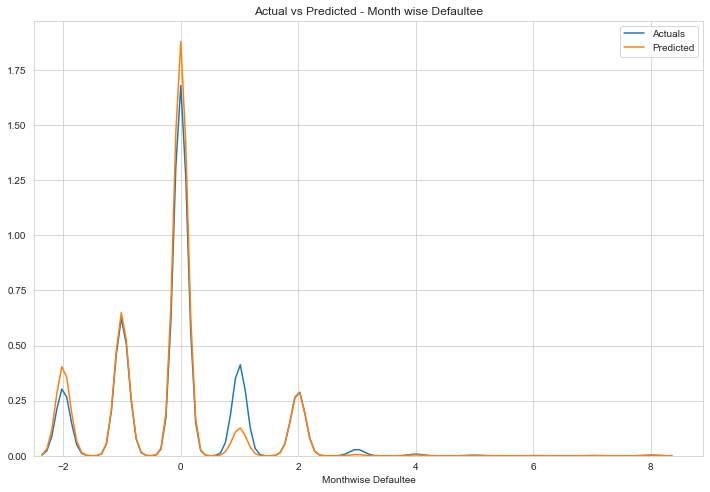

In [118]:
#Distribution Plot mapping the actual defaultee vs predicted defaultee
plt.figure(figsize=(12,8))
sns.distplot(act_pred_df["Actuals"],hist=False,label="Actuals")
sns.distplot(act_pred_df["Predicted"],hist=False,label="Predicted")
plt.xlim(-2.5,)
plt.xlabel("Monthwise Defaultee")
plt.title("Actual vs Predicted - Month wise Defaultee")

As evidenced by the above plot and the accuracy score of 73.44%, we have a good data model on hand here.
Yet, it is better to explore with other classification algorithms to assess the best fit

<h3>Random Forest</h3>

In [119]:
from sklearn.ensemble import RandomForestClassifier

In [168]:
input = [('scaler',StandardScaler()),('model',RandomForestClassifier(n_estimators=100,n_jobs=-1))]

In [169]:
pipe = Pipeline(input)

In [170]:
pipe.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=-1,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [171]:
# Training Accuracy Score
pipe.score(X_train,y_train)

0.9990555555555556

In [172]:
y_pred_rfc = pipe.predict(X_test)

In [173]:
#Prediction Accuracy Score
accuracy_score(y_test,y_pred_rfc)

0.8474166666666667

In [131]:
#Converting the actuals and predicted values to dataframe
act_pred_rfc = pd.DataFrame({"Actuals":y_test,"Predicted":y_pred_rfc})

Text(0.5, 1.0, 'RF Model - Defaultee Actuals vs Prediction')

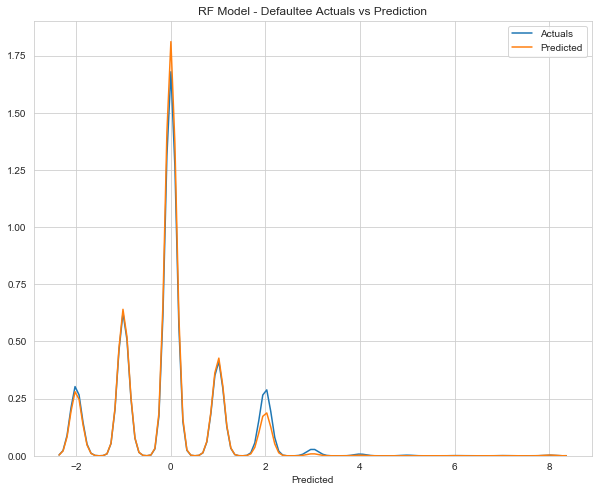

In [176]:
plt.figure(figsize=(10,8))
sns.distplot(act_pred_rfc["Actuals"],hist=False,label="Actuals")
sns.distplot(act_pred_rfc["Predicted"],hist=False,label="Predicted")
plt.title("RF Model - Defaultee Actuals vs Prediction")

So far, RandomForestClassifier has given the best accuracy score of 84.66%

<h4> Conclusion: </h4>
Trained and tested to check Credit Card Risk using Logistic Regression, Multinomial Logistic Regression and Random Forest.
Data Prediction Model using Random Forest proved to be most accurate at predicting the defaultees for various continuous months.
